<a href="https://colab.research.google.com/github/aditya-007/Load-forecasting/blob/main/LR_PR_LSTM_comparison_Schneider_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
np.random.seed(123)

In [ ]:
data = pd.read_csv('train.csv')
print(data.shape)
data.set_index('TimeStamp' , inplace = True)
data.fillna(0, inplace=True)
data.info()

(9120, 47)
<class 'pandas.core.frame.DataFrame'>
Index: 9120 entries, 2022-01-01 00:00:00 to 2023-01-15 23:00:00
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   HeatPump 1_CtrlValve (%)           9120 non-null   float64
 1   HeatPump 2_CtrlValve (%)           9120 non-null   float64
 2   HeatPump Process_CtrlValve (%)     9120 non-null   float64
 3   HeatPump 1_WaterFlow (m3/h)        9120 non-null   float64
 4   HeatPump 2_WaterFlow (m3/h)        9120 non-null   float64
 5   HeatPump Process_WaterFlow (m3/h)  9120 non-null   float64
 6   Distrib_WaterFlow (m3/h)           9120 non-null   float64
 7   HeatPump 1_ThPower (kW)            9120 non-null   float64
 8   HeatPump 2_ThPower (kW)            9120 non-null   float64
 9   HeatPump Process_ThPower (kW)      9120 non-null   float64
 10  Distrib_ThPower (kW)               9120 non-null   float64
 11  HeatPump 1_TempOu

In [ ]:
df = pd.DataFrame(data)
selected_columns = ['Distrib_ThPower (kW)','Weather_TempExt (°C)', 'Weather_HRExt (%)','Distrib_TempOut (°C)','Distrib_TempIn (°C)','Occupancy']
data1 = df[selected_columns]

In [ ]:
data1.info

<bound method DataFrame.info of                      Distrib_ThPower (kW)  Weather_TempExt (°C)  \
TimeStamp                                                         
2022-01-01 00:00:00                 9.984              6.793201   
2022-01-01 01:00:00                33.920              7.088817   
2022-01-01 02:00:00                42.112              6.935573   
2022-01-01 03:00:00                27.904              5.973849   
2022-01-01 04:00:00                36.096              5.838587   
...                                   ...                   ...   
2023-01-15 19:00:00               323.072              4.296602   
2023-01-15 20:00:00               306.688              3.868387   
2023-01-15 21:00:00               315.392              3.417174   
2023-01-15 22:00:00               341.760              3.283532   
2023-01-15 23:00:00               325.120              2.953331   

                     Weather_HRExt (%)  Distrib_TempOut (°C)  \
TimeStamp                                                      
2022-01-01 00:00:00          87.037170             47.449999   
2022-01-01 01:00:00          83.005365             46.331249   
2022-01-01 02:00:00          82.735584             46.478125   
2022-01-01 03:00:00          85.244240             46.443748   
2022-01-01 04:00:00          82.735941             46.818750   
...                                ...                   ...   
2023-01-15 19:00:00          89.313942             44.204689   
2023-01-15 20:00:00          87.559273             44.204687   
2023-01-15 21:00:00          88.815289             42.945312   
2023-01-15 22:00:00          90.063450             43.531250   
2023-01-15 23:00:00          89.551123             44.862499   

                     Distrib_TempIn (°C)  Occupancy  
TimeStamp                                            
2022-01-01 00:00:00            40.318750        0.0  
2022-01-01 01:00:00            37.865625        0.0  
2022-01-01 02:00:00            37.892188        0.0  
2022-01-01 03:00:00            37.315624        0.0  
2022-01-01 04:00:00            37.865623        0.0  
...                                  ...        ...  
2023-01-15 19:00:00            38.145313        0.0  
2023-01-15 20:00:00            38.529688        0.0  
2023-01-15 21:00:00            38.143750        0.0  
2023-01-15 22:00:00            37.832813        0.0  
2023-01-15 23:00:00            38.590623        0.0  

[9120 rows x 6 columns]>

In [ ]:
data1.fillna(0, inplace=True)

<Axes: >

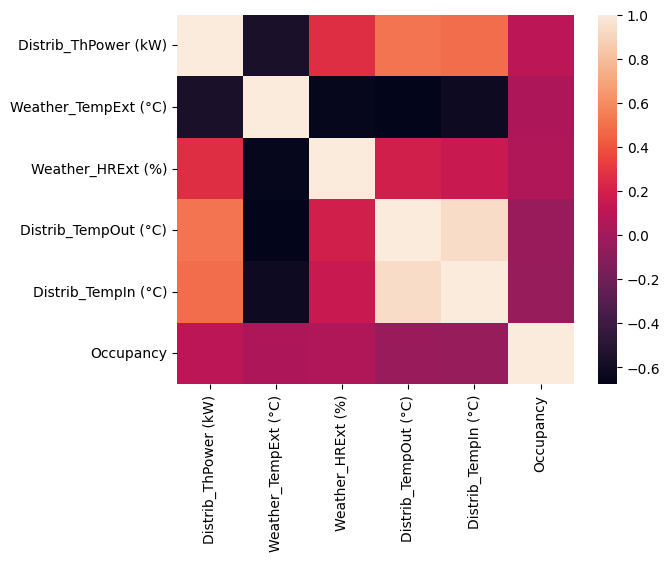

In [ ]:
corr = data1.corr()
sns.heatmap(corr)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Features and target
X = data.drop('Distrib_ThPower (kW)', axis=1)
y = data['Distrib_ThPower (kW)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

# Create a simple model - Logistic Regression
baseline_model = LinearRegression()

# Train the model
baseline_model.fit(X_train, y_train)




LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 30.371538810361766
Mean Squared Error (MSE): 2626.2335806980795
Root Mean Squared Error (RMSE): 51.24679093073126
R-squared (R2): 0.8695976938803529


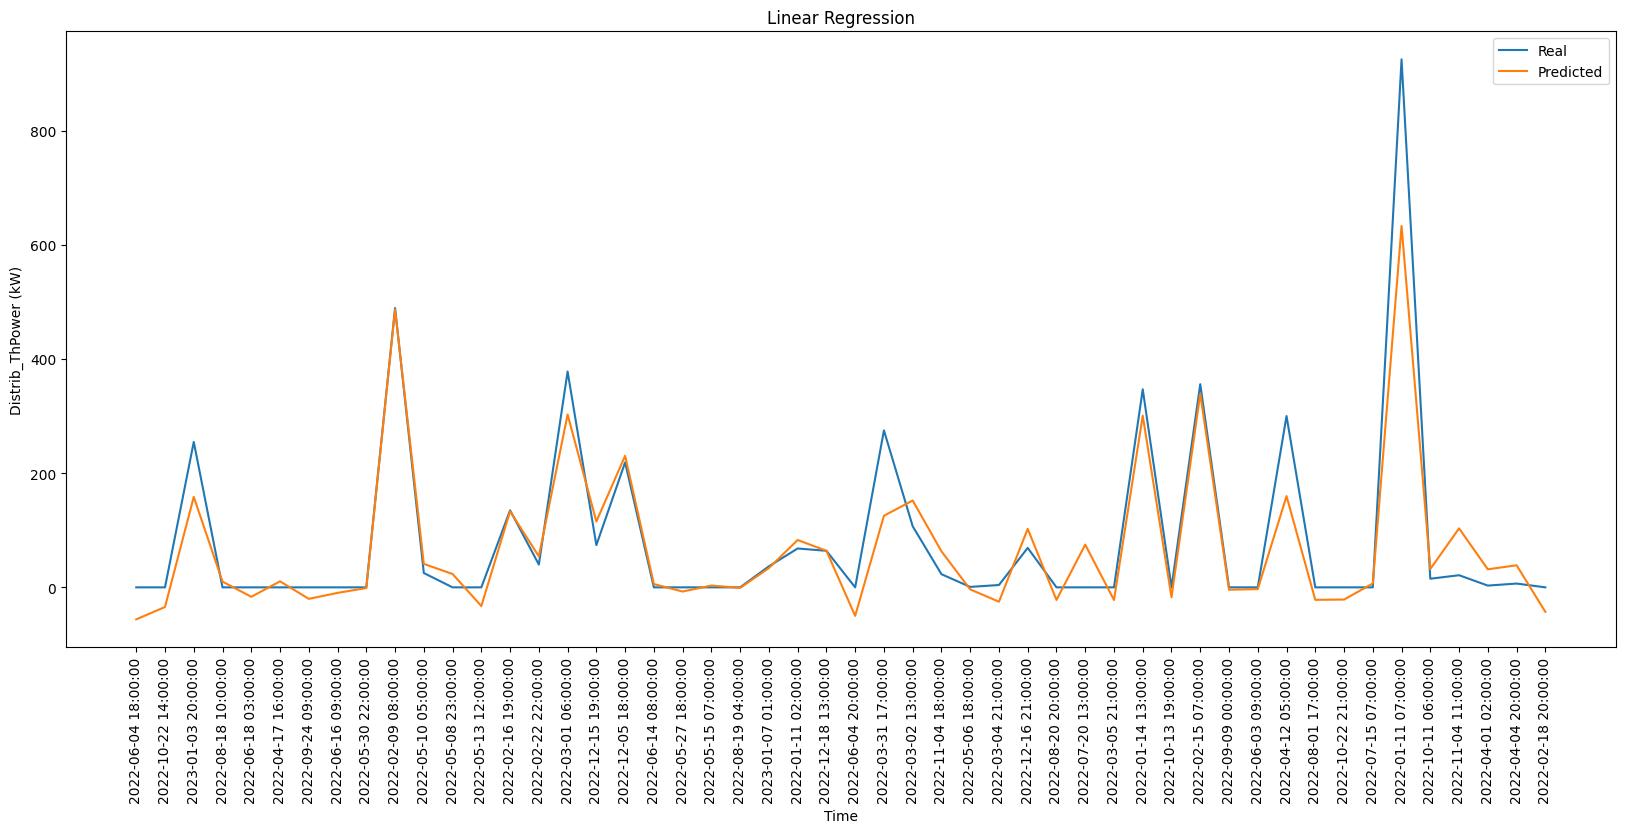

In [ ]:
# Plot the results
plt.figure(figsize=(20,8)) # Increase figure size
plt.plot(y_test[100:150], label = 'Real')
plt.plot(y_pred[100:150], label='Predicted')
# plt.plot(X_train, y_pred_train, color='red', label='Predictions')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Distrib_ThPower (kW)')
plt.legend()
plt.title('Linear Regression')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error



In [ ]:
##Polynomial Regression Order=2
# Features and target
X = data.drop('Distrib_ThPower (kW)', axis=1)
y = data['Distrib_ThPower (kW)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

# Fit a polynomial regression model
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Calculate performance metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
# Print results
print(f"Polynomial Regression (Degree {degree})")
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Training R^2:", train_r2)
print("Test R^2:", test_r2)
print("Training MAE", train_mae)
print("Test MAE", test_mae)




Polynomial Regression (Degree 2)
Training RMSE: 10.787700458659591
Test RMSE: 35.04754058370674
Training R^2: 0.9938362954280295
Test R^2: 0.9390088227416379
Training MAE 7.224712208321712
Test MAE 16.264469938497513


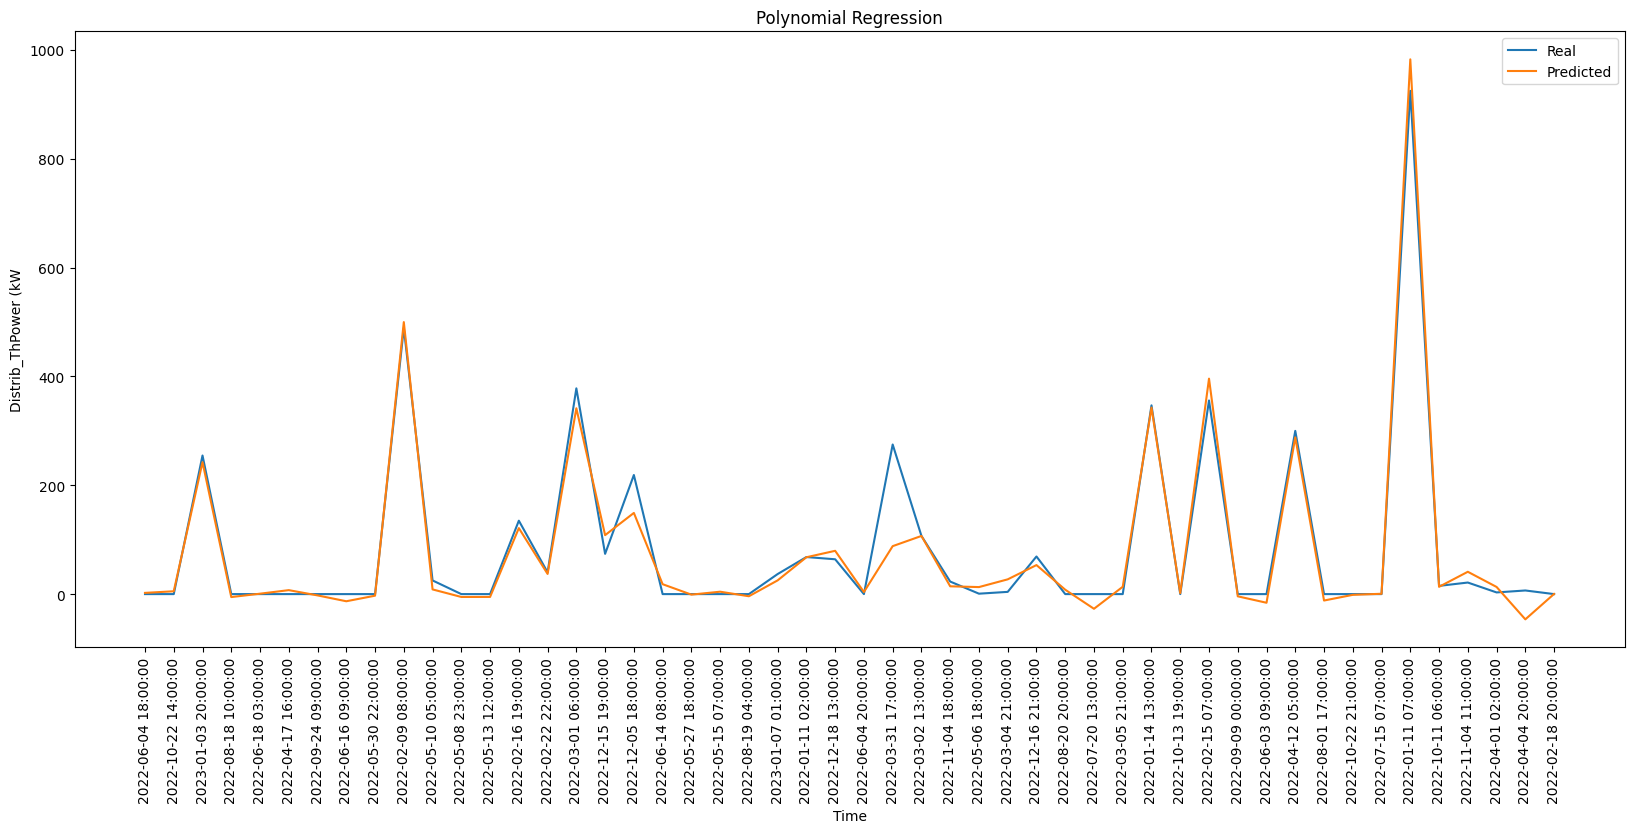

In [ ]:
# Plot the results
plt.figure(figsize=(20,8)) # Increase figure size
plt.plot(y_test[100:150], label = 'Real')
plt.plot(y_pred_test[100:150], label='Predicted')
# plt.plot(X_train, y_pred_train, color='red', label='Predictions')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Distrib_ThPower (kW')
plt.legend()
plt.title('Polynomial Regression')
plt.show()


In [ ]:
##Polynomial Regression Order=3
# Features and target
X = data.drop('Distrib_ThPower (kW)', axis=1)
y = data['Distrib_ThPower (kW)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a polynomial regression model
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Calculate performance metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
# Print results
print(f"Polynomial Regression (Degree {degree})")
print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Training R^2:", train_r2)
print("Test R^2:", test_r2)
print("Training MAE", train_mae)
print("Test MAE", test_mae)



In [ ]:
# Plot the results
plt.figure(figsize=(20,8)) # Increase figure size
plt.plot(y_test[100:150], label = 'Real')
plt.plot(y_pred_test[100:150], label='Predicted')
# plt.plot(X_train, y_pred_train, color='red', label='Predictions')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Distrib_ThPower (kW)')
plt.legend()
plt.title('Polynomial Regression (Degree {degree})')
plt.show()
# Plot the results



In [ ]:
plt.figure(figsize=(8,3)) # Increase figure size
(y_test[100:150] - y_pred_test[100:150]).plot()
plt.xticks(rotation=90)
plt.grid(True)

In [ ]:
# 5. Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
# Convert the DataFrame to a NumPy array for scaling
data_array = data.values
scaled_data = scaler.fit_transform(data_array)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Now you can use the drop method on the DataFrame
X = scaled_df.drop('Distrib_ThPower (kW)', axis=1)
y = scaled_df['Distrib_ThPower (kW)']

# Separate features and target
#X = scaled_data[:, :-1]  # All columns except target
#y = scaled_data[:, -1]   # Target column

# 6. Create sequences for LSTM
def create_sequences(X, y, time_steps=24):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i+time_steps])
        y_seq.append(y[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 24  # You can adjust this
X_seq, y_seq = create_sequences(X, y, time_steps)

# 7. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=0)

In [ ]:
# 8. Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))  # Dense layer with ReLU activation
# Output layer for SYSLoad prediction
model.add(Dense(units=1))

# 9. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 10. Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
228/228 [==============================] - 15s 50ms/step - loss: 0.0072 - val_loss: 0.0034
Epoch 2/100
228/228 [==============================] - 10s 44ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 3/100
228/228 [==============================] - 11s 46ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 4/100
228/228 [==============================] - 10s 46ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 5/100
228/228 [==============================] - 11s 47ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 6/100
228/228 [==============================] - 11s 46ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 7/100
228/228 [==============================] - 10s 45ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 8/100
228/228 [==============================] - 10s 45ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 9/100
228/228 [==============================] - 10s 45ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 10/100
228/228 [==============================] - 10s 45ms/step - l

In [ ]:
# 11. Make predictions
y_pred = model.predict(X_test)

57/57 [==============================] - 2s 17ms/step


In [ ]:
# 12. Inverse scale the predictions and true values
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_pred), axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

In [ ]:
# 13. Evaluate the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


NameError: name 'mean_squared_error' is not defined

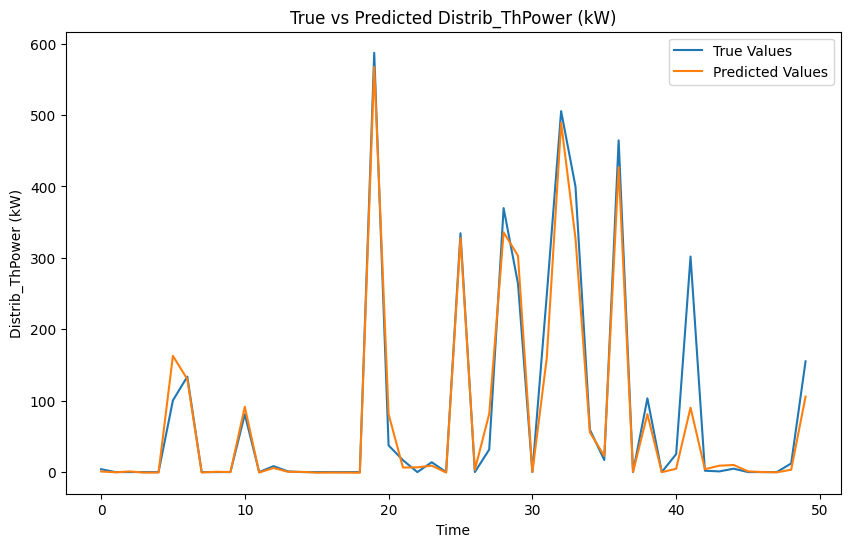

In [ ]:
# 14. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled[100:150], label='True Values')
plt.plot(y_pred_rescaled[100:150], label='Predicted Values')
plt.title('True vs Predicted Distrib_ThPower (kW)')
plt.xlabel('Time')
plt.ylabel('Distrib_ThPower (kW)')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=31100686-1104-4f6c-a1b8-828c679b87eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>